In [59]:
from datetime import datetime
from pprint import pprint
import json

import matplotlib.pyplot as plt
import requests

%matplotlib nbagg

In [38]:
url = 'https://uvdata.arpansa.gov.au/api/uvlevel/?longitude=138.62&latitude=-34.92&date=2018-10-07'

In [39]:
data = json.loads(requests.get(url).text)
pprint(data)

{'$id': '1',
 'CurrentDateTime': '07-10-2018 18:44',
 'CurrentUVIndex': '0.1',
 'GraphData': [{'$id': '2',
                'Date': '2018-10-07 06:00',
                'Forecast': None,
                'Measured': 0.009021648},
               {'$id': '3',
                'Date': '2018-10-07 06:01',
                'Forecast': None,
                'Measured': 0.009021648},
               {'$id': '4',
                'Date': '2018-10-07 06:02',
                'Forecast': None,
                'Measured': 0.009015514},
               {'$id': '5',
                'Date': '2018-10-07 06:03',
                'Forecast': None,
                'Measured': 0.009031598},
               {'$id': '6',
                'Date': '2018-10-07 06:04',
                'Forecast': None,
                'Measured': 0.009005475},
               {'$id': '7',
                'Date': '2018-10-07 06:05',
                'Forecast': None,
                'Measured': 0.009013564},
               {'$id': '8',
     

                'Date': '2018-10-07 09:59',
                'Forecast': None,
                'Measured': 1.906954},
               {'$id': '242',
                'Date': '2018-10-07 10:00',
                'Forecast': None,
                'Measured': 1.93472},
               {'$id': '243',
                'Date': '2018-10-07 10:01',
                'Forecast': None,
                'Measured': 1.971759},
               {'$id': '244',
                'Date': '2018-10-07 10:02',
                'Forecast': None,
                'Measured': 2.018827},
               {'$id': '245',
                'Date': '2018-10-07 10:03',
                'Forecast': None,
                'Measured': 2.062417},
               {'$id': '246',
                'Date': '2018-10-07 10:04',
                'Forecast': None,
                'Measured': 2.119215},
               {'$id': '247',
                'Date': '2018-10-07 10:05',
                'Forecast': None,
                'Measured': 2.154654},
  

               {'$id': '369',
                'Date': '2018-10-07 12:07',
                'Forecast': None,
                'Measured': 6.198638},
               {'$id': '370',
                'Date': '2018-10-07 12:08',
                'Forecast': None,
                'Measured': 6.2087},
               {'$id': '371',
                'Date': '2018-10-07 12:09',
                'Forecast': None,
                'Measured': 6.231865},
               {'$id': '372',
                'Date': '2018-10-07 12:10',
                'Forecast': None,
                'Measured': 6.256755},
               {'$id': '373',
                'Date': '2018-10-07 12:11',
                'Forecast': None,
                'Measured': 6.27205},
               {'$id': '374',
                'Date': '2018-10-07 12:12',
                'Forecast': None,
                'Measured': 6.290517},
               {'$id': '375',
                'Date': '2018-10-07 12:13',
                'Forecast': None,
             

                'Forecast': None,
                'Measured': 5.415871},
               {'$id': '522',
                'Date': '2018-10-07 14:40',
                'Forecast': None,
                'Measured': 5.394871},
               {'$id': '523',
                'Date': '2018-10-07 14:41',
                'Forecast': None,
                'Measured': 5.371777},
               {'$id': '524',
                'Date': '2018-10-07 14:42',
                'Forecast': None,
                'Measured': 5.3469},
               {'$id': '525',
                'Date': '2018-10-07 14:43',
                'Forecast': None,
                'Measured': 5.320255},
               {'$id': '526',
                'Date': '2018-10-07 14:44',
                'Forecast': None,
                'Measured': 5.293762},
               {'$id': '527',
                'Date': '2018-10-07 14:45',
                'Forecast': None,
                'Measured': 5.271483},
               {'$id': '528',
                '

                'Measured': 1.899513},
               {'$id': '647',
                'Date': '2018-10-07 16:45',
                'Forecast': None,
                'Measured': 1.87497},
               {'$id': '648',
                'Date': '2018-10-07 16:46',
                'Forecast': None,
                'Measured': 1.849612},
               {'$id': '649',
                'Date': '2018-10-07 16:47',
                'Forecast': None,
                'Measured': 1.824548},
               {'$id': '650',
                'Date': '2018-10-07 16:48',
                'Forecast': None,
                'Measured': 1.800341},
               {'$id': '651',
                'Date': '2018-10-07 16:49',
                'Forecast': None,
                'Measured': 1.776595},
               {'$id': '652',
                'Date': '2018-10-07 16:50',
                'Forecast': None,
                'Measured': 1.75373},
               {'$id': '653',
                'Date': '2018-10-07 16:51',
       

                'Measured': None},
               {'$id': '837',
                'Date': '2018-10-07 19:55',
                'Forecast': None,
                'Measured': None},
               {'$id': '838',
                'Date': '2018-10-07 19:56',
                'Forecast': None,
                'Measured': None},
               {'$id': '839',
                'Date': '2018-10-07 19:57',
                'Forecast': None,
                'Measured': None},
               {'$id': '840',
                'Date': '2018-10-07 19:58',
                'Forecast': None,
                'Measured': None},
               {'$id': '841',
                'Date': '2018-10-07 19:59',
                'Forecast': None,
                'Measured': None}],
 'MaximumUVLevel': '6.8',
 'MaximumUVLevelDateTime': '2018-10-07 13:09',
 'TableData': [{'$id': '842',
                'Date': '2018-10-07 06:00',
                'Forecast': 'n/a',
                'Measured': '0.0'},
               {'$id': '843',
 

In [40]:
len(data['GraphData'])

840

In [41]:
def unzip(graph_data_series):
    dates = []
    forecast = []
    observed = []
    for item in graph_data_series:
        dates.append(datetime.strptime(item['Date'], '%Y-%m-%d %H:%M'))
        forecast.append(item['Forecast'])
        observed.append(item['Measured'])
    return {
        'dates': np.asarray(dates),
        'forecast': np.asarray(forecast),
        'observed': np.asarray(observed)
    }

<IPython.core.display.Javascript object>


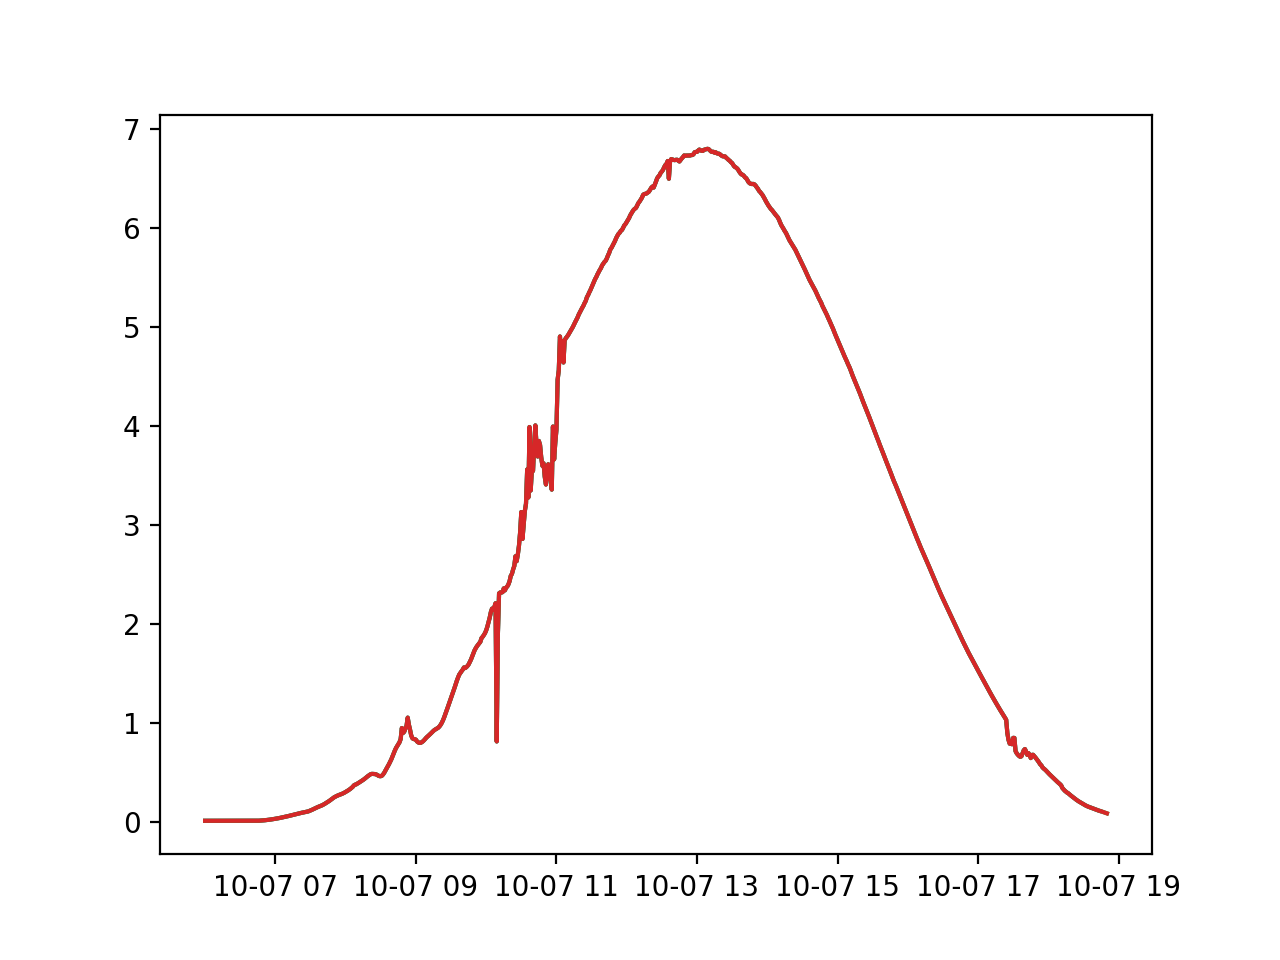

In [43]:
series = unzip(data['GraphData'])
plt.plot(series['dates'], series['observed'])
plt.plot(series['dates'], series['forecast'])

In [55]:
REQUEST_URL = 'https://uvdata.arpansa.gov.au/api/uvlevel/?longitude={lon:.2f}&latitude={lat:.2f}&date={date}'

def uvlevel(lon, lat, date=None):
    if date is None:
        date = datetime.today()
    datasource = json.loads(requests.get(REQUEST_URL.format(lon=lon, lat=lat, date=date.strftime('%Y-%m-%d'))).text)
    data = unzip(datasource['GraphData'])
    data['datasource'] = datasource
    return data

<IPython.core.display.Javascript object>


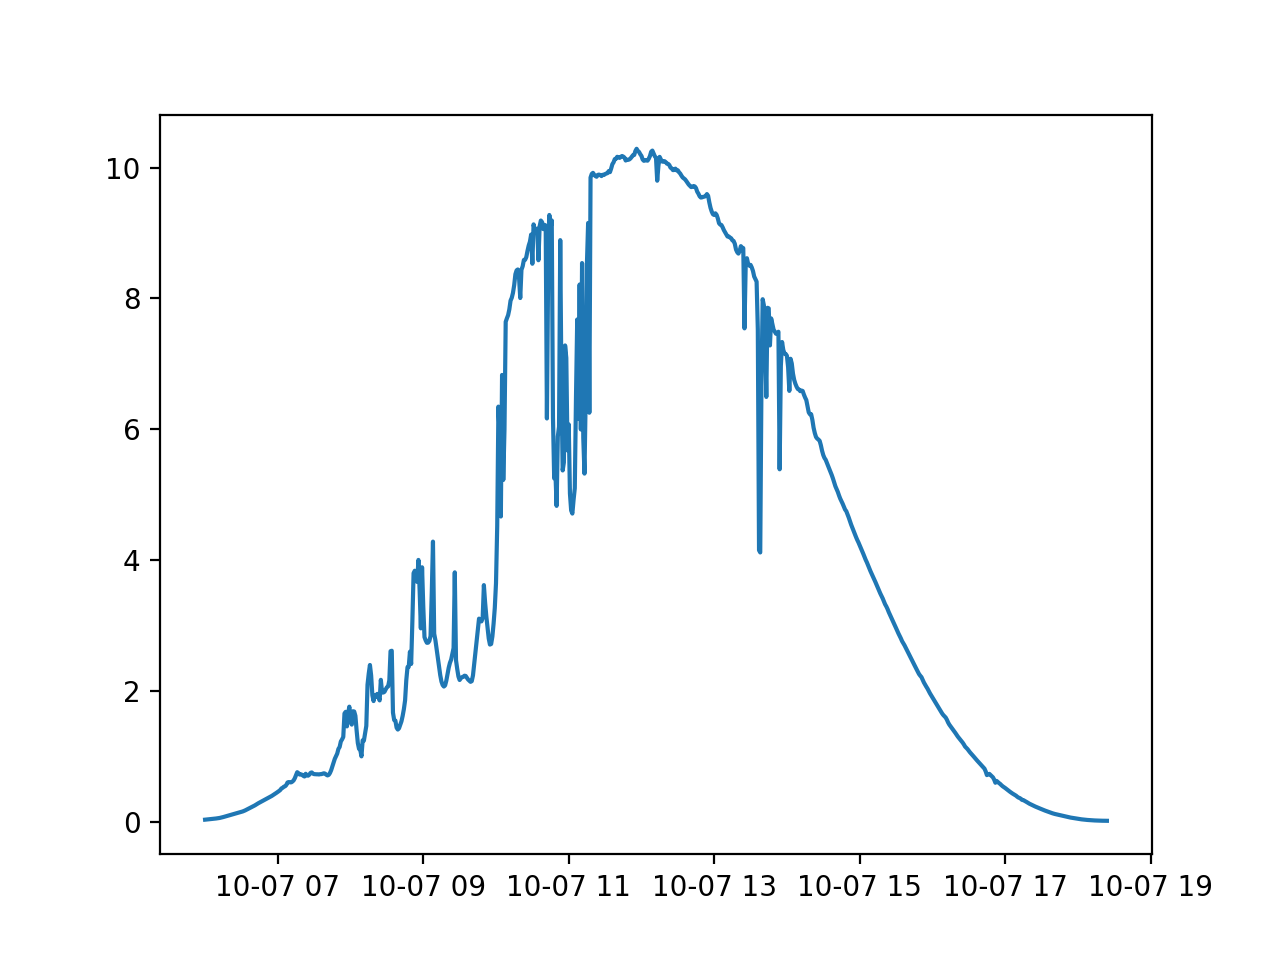

In [56]:
data = uvlevel(144, -20)
fig = plt.figure()
plt.plot(data['dates'], data['observed'])
plt.plot(data['dates'], data['forecast'])

In [58]:
data['datasource'].keys()

dict_keys(['$id', 'GraphData', 'TableData', 'CurrentDateTime', 'CurrentUVIndex', 'MaximumUVLevel', 'MaximumUVLevelDateTime'])

It's not great, beacause we don't know where the observed data comes from. The nearest site, obviously - but where is that?

In [62]:
url = 'https://uvdata.arpansa.gov.au/api/uvlevel/?longitude=138.62&latitude=-34.92&date=2018-10-05'
data = json.loads(requests.get(url).text)
pprint(data)

{'$id': '1',
 'CurrentDateTime': '05-10-2018 19:59',
 'CurrentUVIndex': '0.0',
 'GraphData': [{'$id': '2',
                'Date': '2018-10-05 06:00',
                'Forecast': 0.081164,
                'Measured': 0.02924806},
               {'$id': '3',
                'Date': '2018-10-05 06:01',
                'Forecast': 0.082088,
                'Measured': 0.03086652},
               {'$id': '4',
                'Date': '2018-10-05 06:02',
                'Forecast': 0.083116,
                'Measured': 0.03271641},
               {'$id': '5',
                'Date': '2018-10-05 06:03',
                'Forecast': 0.084248,
                'Measured': 0.03470523},
               {'$id': '6',
                'Date': '2018-10-05 06:04',
                'Forecast': 0.085488,
                'Measured': 0.03680253},
               {'$id': '7',
                'Date': '2018-10-05 06:05',
                'Forecast': 0.086832,
                'Measured': 0.03914201},
               

                'Date': '2018-10-05 09:50',
                'Forecast': 4.47239971,
                'Measured': 4.58582},
               {'$id': '233',
                'Date': '2018-10-05 09:51',
                'Forecast': 4.5028,
                'Measured': 4.666625},
               {'$id': '234',
                'Date': '2018-10-05 09:52',
                'Forecast': 4.5332,
                'Measured': 4.692582},
               {'$id': '235',
                'Date': '2018-10-05 09:53',
                'Forecast': 4.5636,
                'Measured': 4.714168},
               {'$id': '236',
                'Date': '2018-10-05 09:54',
                'Forecast': 4.594,
                'Measured': 4.692323},
               {'$id': '237',
                'Date': '2018-10-05 09:55',
                'Forecast': 4.6244,
                'Measured': 4.70782},
               {'$id': '238',
                'Date': '2018-10-05 09:56',
                'Forecast': 4.6544,
                'Measured

                'Date': '2018-10-05 11:41',
                'Forecast': 6.8276,
                'Measured': 6.91338},
               {'$id': '344',
                'Date': '2018-10-05 11:42',
                'Forecast': 6.83480024,
                'Measured': 6.916642},
               {'$id': '345',
                'Date': '2018-10-05 11:43',
                'Forecast': 6.8416,
                'Measured': 6.916169},
               {'$id': '346',
                'Date': '2018-10-05 11:44',
                'Forecast': 6.84800053,
                'Measured': 6.92118},
               {'$id': '347',
                'Date': '2018-10-05 11:45',
                'Forecast': 6.8544,
                'Measured': 6.921374},
               {'$id': '348',
                'Date': '2018-10-05 11:46',
                'Forecast': 6.86039972,
                'Measured': 6.925334},
               {'$id': '349',
                'Date': '2018-10-05 11:47',
                'Forecast': 6.866,
                '

               {'$id': '510',
                'Date': '2018-10-05 14:28',
                'Forecast': 4.184,
                'Measured': 4.220873},
               {'$id': '511',
                'Date': '2018-10-05 14:29',
                'Forecast': 4.1528,
                'Measured': 4.191227},
               {'$id': '512',
                'Date': '2018-10-05 14:30',
                'Forecast': 4.1216,
                'Measured': 4.160877},
               {'$id': '513',
                'Date': '2018-10-05 14:31',
                'Forecast': 4.0908,
                'Measured': 4.13564},
               {'$id': '514',
                'Date': '2018-10-05 14:32',
                'Forecast': 4.0596,
                'Measured': 4.111991},
               {'$id': '515',
                'Date': '2018-10-05 14:33',
                'Forecast': 4.0284,
                'Measured': 4.07927},
               {'$id': '516',
                'Date': '2018-10-05 14:34',
                'Forecast': 3.99696

                'Forecast': 0.323535979,
                'Measured': 0.3309723},
               {'$id': '677',
                'Date': '2018-10-05 17:15',
                'Forecast': 0.314840019,
                'Measured': 0.3215598},
               {'$id': '678',
                'Date': '2018-10-05 17:16',
                'Forecast': 0.306328,
                'Measured': 0.3123178},
               {'$id': '679',
                'Date': '2018-10-05 17:17',
                'Forecast': 0.298,
                'Measured': 0.302998},
               {'$id': '680',
                'Date': '2018-10-05 17:18',
                'Forecast': 0.289852,
                'Measured': 0.2946196},
               {'$id': '681',
                'Date': '2018-10-05 17:19',
                'Forecast': 0.281888,
                'Measured': 0.2858256},
               {'$id': '682',
                'Date': '2018-10-05 17:20',
                'Forecast': 0.2741,
                'Measured': 0.2774482},
          

                'Measured': 0.008931567},
               {'$id': '788',
                'Date': '2018-10-05 19:06',
                'Forecast': 0.0,
                'Measured': 0.008919572},
               {'$id': '789',
                'Date': '2018-10-05 19:07',
                'Forecast': 0.0,
                'Measured': 0.008939644},
               {'$id': '790',
                'Date': '2018-10-05 19:08',
                'Forecast': 0.0,
                'Measured': 0.008927478},
               {'$id': '791',
                'Date': '2018-10-05 19:09',
                'Forecast': 0.0,
                'Measured': 0.008919483},
               {'$id': '792',
                'Date': '2018-10-05 19:10',
                'Forecast': 0.0,
                'Measured': 0.00890136},
               {'$id': '793',
                'Date': '2018-10-05 19:11',
                'Forecast': 0.0,
                'Measured': 0.008895232},
               {'$id': '794',
                'Date': '2018-10-05